In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.metrics import mean_squared_error
from tensorflow.keras.datasets import mnist


In [25]:
# Load dataset
(X_train, _), _ = mnist.load_data()
X = X_train.reshape(-1, 28*28) / 255.0  # normalize


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [26]:
# Parameters
k = 50  # number of components


In [29]:
# PCA
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X)   # <-- use fit_transform instead of just transform
X_pca_recon = pca.inverse_transform(X_pca)
mse_pca = mean_squared_error(X, X_pca_recon)


In [28]:
# PPCA (via FactorAnalysis)
ppca = FactorAnalysis(n_components=k)
X_ppca = ppca.fit_transform(X)
X_ppca_recon = X_ppca @ ppca.components_ + ppca.mean_
mse_ppca = mean_squared_error(X, X_ppca_recon)

In [30]:
print(f"PCA MSE: {mse_pca:.4f}")
print(f"PPCA MSE: {mse_ppca:.4f}")

PCA MSE: 0.0118
PPCA MSE: 0.0141


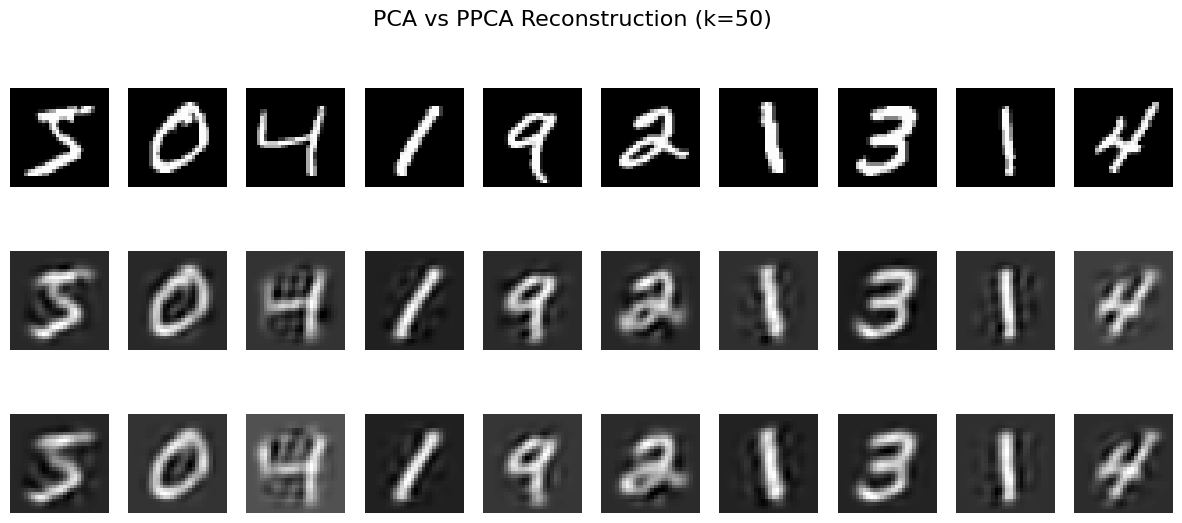

In [32]:
n = 10  # number of images to display
plt.figure(figsize=(15, 6))

# Titles for each row
row_titles = ["Original", "PCA Reconstruction", "PPCA Reconstruction"]

for row in range(3):
    for i in range(n):
        plt.subplot(3, n, row*n + i + 1)

        if row == 0:
            plt.imshow(X[i].reshape(28, 28), cmap="gray")
        elif row == 1:
            plt.imshow(X_pca_recon[i].reshape(28, 28), cmap="gray")
        else:
            plt.imshow(X_ppca_recon[i].reshape(28, 28), cmap="gray")

        plt.axis("off")

        # Add row labels on the first column
        if i == 0:
            plt.ylabel(row_titles[row], fontsize=12)

plt.suptitle(f"PCA vs PPCA Reconstruction (k={k})", fontsize=16)
plt.show()

In [ ]:
'''Observations:

1.Both PCA & PPCA reconstructions are blurry compared to originals.
* That’s expected: we compressed 784 features → 50 components.
* Much of the fine-grained detail is lost.

2.PCA vs PPCA quality looks very close.
* Both capture the main structure (digit outlines).
* Some differences:
    PCA images are slightly sharper (since PCA minimizes squared error directly).
    PPCA images look a bit smoother / noisier, because PPCA assumes an underlying probabilistic model with Gaussian noise.

3.Compression trade-off:
* With only ~6% of the original dimensions (50 / 784), you can still recognize digits.
* If you increase k (say 100 or 200), the reconstructions will get sharper.
* If you decrease k (like 10), digits will become blobs but still distinguishable.'''